## 第53课 神经网络ANN(MLP), CNN, RNN区别及应用(四)

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

### Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

The steps you are going to cover in this tutorial are as follows:

(1)Define Keras Model

(2)Load Data

(3)Compile Keras Model

(4)Fit Keras Model

(5)Evaluate Keras Model

(6)Make Predictions

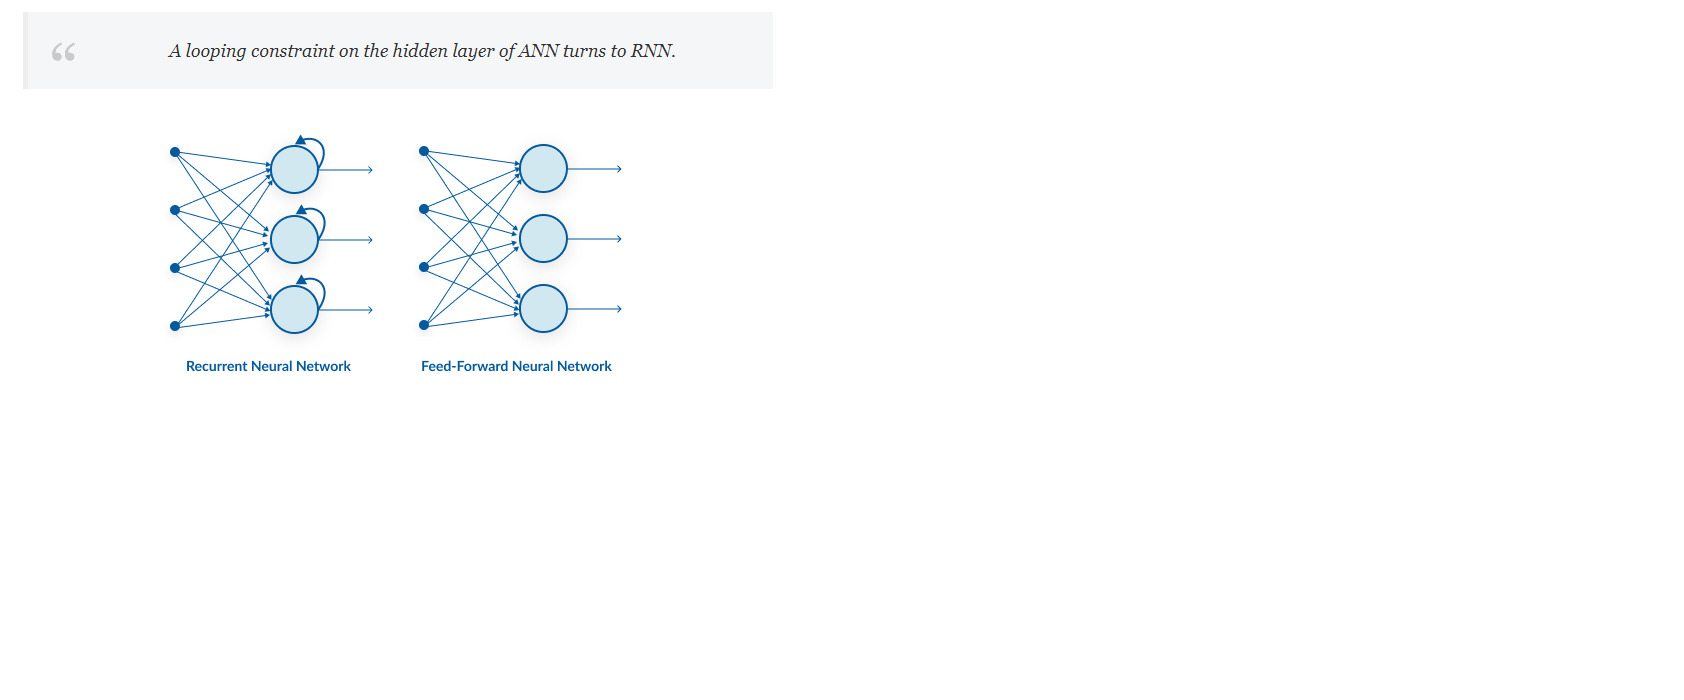

In [5]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson53-RNN.png')

Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data

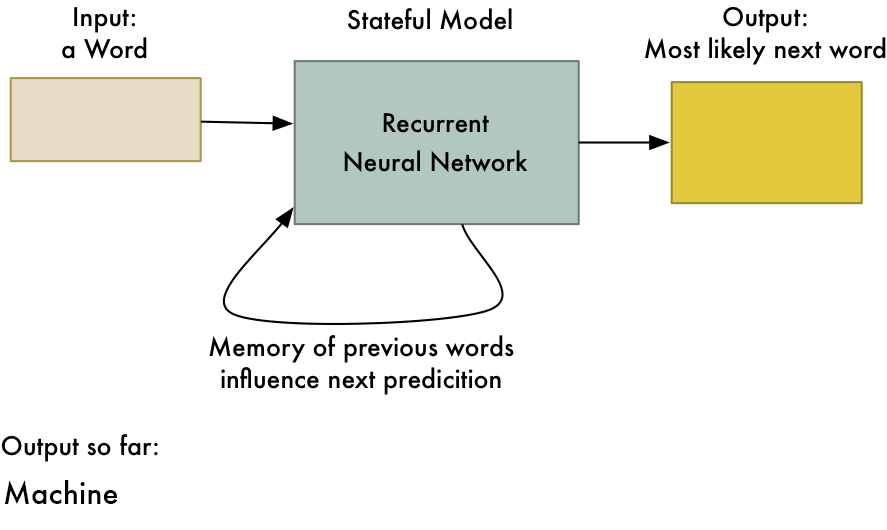

In [2]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson53-Image-7.gif')

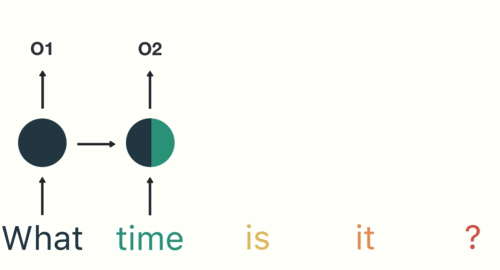

In [42]:
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson53-Image-8.gif')

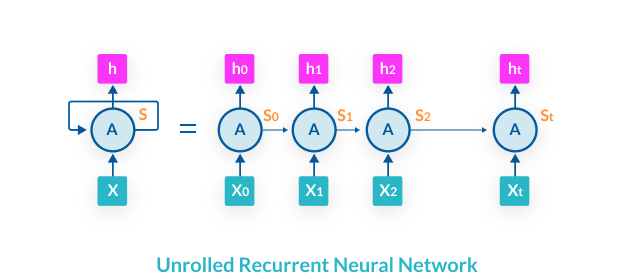

In [43]:
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson53-unrolled.png')

RNN save the output of processing nodes and feed the result back into the model (they did not pass the information in one direction only). This is how the model is said to learn to predict the outcome of a layer. Each node in the RNN model acts as a memory cell, continuing the computation and implementation of operations. If the network’s prediction is incorrect, then the system self-learns and continues working towards the correct prediction during backpropagation.

Sequence data

Advantages:

An RNN remembers each and every information through time. It is useful in time series prediction only because of the feature to remember previous inputs as well. This is called Long Short Term Memory.
Recurrent neural network are even used with convolutional layers to extend the effective pixel neighborhood.

Disadvantages:

Gradient vanishing and exploding problems.
Training an RNN is a very difficult task.
It cannot process very long sequences if using tanh or relu as an activation function

Application of Recurrent Neural Network
Language Modelling and Translation 
Machine Translation
Speech Recognition
Generating Image Descriptions
Video Tagging

In [69]:
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [70]:
# load the dataset
df = read_csv('Lesson53-monthly-car-sales.csv', header=0, index_col=0, squeeze=True)
df

Month
1960-01     6550
1960-02     8728
1960-03    12026
1960-04    14395
1960-05    14587
           ...  
1968-08    16722
1968-09    14385
1968-10    21342
1968-11    17180
1968-12    14577
Name: Sales, Length: 108, dtype: int64

In [71]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

In [72]:
# retrieve the values
#values = df.values.astype('float32')
values = df.values
values

array([ 6550,  8728, 12026, 14395, 14587, 13791,  9498,  8251,  7049,
        9545,  9364,  8456,  7237,  9374, 11837, 13784, 15926, 13821,
       11143,  7975,  7610, 10015, 12759,  8816, 10677, 10947, 15200,
       17010, 20900, 16205, 12143,  8997,  5568, 11474, 12256, 10583,
       10862, 10965, 14405, 20379, 20128, 17816, 12268,  8642,  7962,
       13932, 15936, 12628, 12267, 12470, 18944, 21259, 22015, 18581,
       15175, 10306, 10792, 14752, 13754, 11738, 12181, 12965, 19990,
       23125, 23541, 21247, 15189, 14767, 10895, 17130, 17697, 16611,
       12674, 12760, 20249, 22135, 20677, 19933, 15388, 15113, 13401,
       16135, 17562, 14720, 12225, 11608, 20985, 19692, 24081, 22114,
       14220, 13434, 13598, 17187, 16119, 13713, 13210, 14251, 20139,
       21725, 26099, 21084, 18024, 16722, 14385, 21342, 17180, 14577],
      dtype=int64)

In [73]:
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)

In [76]:
X

array([[ 6550,  8728, 12026, 14395, 14587],
       [ 8728, 12026, 14395, 14587, 13791],
       [12026, 14395, 14587, 13791,  9498],
       [14395, 14587, 13791,  9498,  8251],
       [14587, 13791,  9498,  8251,  7049],
       [13791,  9498,  8251,  7049,  9545],
       [ 9498,  8251,  7049,  9545,  9364],
       [ 8251,  7049,  9545,  9364,  8456],
       [ 7049,  9545,  9364,  8456,  7237],
       [ 9545,  9364,  8456,  7237,  9374],
       [ 9364,  8456,  7237,  9374, 11837],
       [ 8456,  7237,  9374, 11837, 13784],
       [ 7237,  9374, 11837, 13784, 15926],
       [ 9374, 11837, 13784, 15926, 13821],
       [11837, 13784, 15926, 13821, 11143],
       [13784, 15926, 13821, 11143,  7975],
       [15926, 13821, 11143,  7975,  7610],
       [13821, 11143,  7975,  7610, 10015],
       [11143,  7975,  7610, 10015, 12759],
       [ 7975,  7610, 10015, 12759,  8816],
       [ 7610, 10015, 12759,  8816, 10677],
       [10015, 12759,  8816, 10677, 10947],
       [12759,  8816, 10677, 109

In [77]:
X[1]

array([ 8728, 12026, 14395, 14587, 13791], dtype=int64)

In [78]:
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1],1))

In [81]:
X

array([[[ 6550],
        [ 8728],
        [12026],
        [14395],
        [14587]],

       [[ 8728],
        [12026],
        [14395],
        [14587],
        [13791]],

       [[12026],
        [14395],
        [14587],
        [13791],
        [ 9498]],

       [[14395],
        [14587],
        [13791],
        [ 9498],
        [ 8251]],

       [[14587],
        [13791],
        [ 9498],
        [ 8251],
        [ 7049]],

       [[13791],
        [ 9498],
        [ 8251],
        [ 7049],
        [ 9545]],

       [[ 9498],
        [ 8251],
        [ 7049],
        [ 9545],
        [ 9364]],

       [[ 8251],
        [ 7049],
        [ 9545],
        [ 9364],
        [ 8456]],

       [[ 7049],
        [ 9545],
        [ 9364],
        [ 8456],
        [ 7237]],

       [[ 9545],
        [ 9364],
        [ 8456],
        [ 7237],
        [ 9374]],

       [[ 9364],
        [ 8456],
        [ 7237],
        [ 9374],
        [11837]],

       [[ 8456],
        [ 7237],
        [

In [82]:
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

In [83]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(91, 5, 1) (12, 5, 1) (91,) (12,)


In [84]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [85]:
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Train on 91 samples, validate on 12 samples
Epoch 1/350
91/91 [==============================] - 2s 17ms/sample - loss: 94767976.3956 - mean_absolute_error: 7368.6670 - val_loss: 106031232.0000 - val_mean_absolute_error: 8801.2080
Epoch 2/350
91/91 [==============================] - 0s 835us/sample - loss: 53994229.0549 - mean_absolute_error: 6306.5840 - val_loss: 41462620.0000 - val_mean_absolute_error: 5456.2188
Epoch 3/350
91/91 [==============================] - 0s 692us/sample - loss: 31414234.1319 - mean_absolute_error: 4398.4707 - val_loss: 39859620.0000 - val_mean_absolute_error: 5000.3599
Epoch 4/350
91/91 [==============================] - 0s 483us/sample - loss: 39061496.7033 - mean_absolute_error: 4827.8350 - val_loss: 33420510.0000 - val_mean_absolute_error: 4587.2002
Epoch 5/350
91/91 [==============================] - 0s 736us/sample - loss: 28405567.5824 - mean_absolute_error: 4129.2944 - val_loss: 36853548.0000 - val_mean_absolute_error: 4872.3159
Epoch 6/350
91/91 [==

91/91 [==============================] - 0s 747us/sample - loss: 11870078.5275 - mean_absolute_error: 2794.8987 - val_loss: 13716053.0000 - val_mean_absolute_error: 3172.7998
Epoch 45/350
91/91 [==============================] - 0s 571us/sample - loss: 11555481.9341 - mean_absolute_error: 2705.6780 - val_loss: 13781924.0000 - val_mean_absolute_error: 3150.4363
Epoch 46/350
91/91 [==============================] - 0s 637us/sample - loss: 13026250.2308 - mean_absolute_error: 2895.7576 - val_loss: 12162748.0000 - val_mean_absolute_error: 2912.5984
Epoch 47/350
91/91 [==============================] - 0s 582us/sample - loss: 12063454.9341 - mean_absolute_error: 2800.7051 - val_loss: 10922903.0000 - val_mean_absolute_error: 2435.2695
Epoch 48/350
91/91 [==============================] - 0s 494us/sample - loss: 9745730.1319 - mean_absolute_error: 2517.8911 - val_loss: 10366294.0000 - val_mean_absolute_error: 2481.0969
Epoch 49/350
91/91 [==============================] - 0s 417us/sample - lo

Epoch 88/350
91/91 [==============================] - 0s 659us/sample - loss: 7455740.1099 - mean_absolute_error: 2088.2349 - val_loss: 11347531.0000 - val_mean_absolute_error: 2796.4578
Epoch 89/350
91/91 [==============================] - 0s 802us/sample - loss: 8061272.7363 - mean_absolute_error: 2158.9258 - val_loss: 11796484.0000 - val_mean_absolute_error: 2969.7090
Epoch 90/350
91/91 [==============================] - 0s 736us/sample - loss: 8278321.7582 - mean_absolute_error: 2217.5020 - val_loss: 14033720.0000 - val_mean_absolute_error: 3178.6055
Epoch 91/350
91/91 [==============================] - 0s 922us/sample - loss: 7941510.0989 - mean_absolute_error: 2175.4436 - val_loss: 13935331.0000 - val_mean_absolute_error: 3110.5129
Epoch 92/350
91/91 [==============================] - 0s 736us/sample - loss: 8411946.5604 - mean_absolute_error: 2218.6692 - val_loss: 14393220.0000 - val_mean_absolute_error: 3355.3750
Epoch 93/350
91/91 [==============================] - 0s 1ms/samp

Epoch 132/350
91/91 [==============================] - 0s 791us/sample - loss: 6775346.8022 - mean_absolute_error: 2088.7859 - val_loss: 11628901.0000 - val_mean_absolute_error: 2878.4661
Epoch 133/350
91/91 [==============================] - 0s 527us/sample - loss: 6656965.0385 - mean_absolute_error: 2030.9473 - val_loss: 11735051.0000 - val_mean_absolute_error: 2914.2532
Epoch 134/350
91/91 [==============================] - 0s 538us/sample - loss: 5817217.1099 - mean_absolute_error: 1912.9785 - val_loss: 12991731.0000 - val_mean_absolute_error: 2770.2004
Epoch 135/350
91/91 [==============================] - 0s 637us/sample - loss: 6178810.2527 - mean_absolute_error: 1974.8468 - val_loss: 12152419.0000 - val_mean_absolute_error: 3025.7383
Epoch 136/350
91/91 [==============================] - 0s 538us/sample - loss: 6038705.7802 - mean_absolute_error: 1925.1847 - val_loss: 12340767.0000 - val_mean_absolute_error: 2829.0608
Epoch 137/350
91/91 [==============================] - 0s 67

91/91 [==============================] - 0s 571us/sample - loss: 5702294.2363 - mean_absolute_error: 1867.2510 - val_loss: 14264859.0000 - val_mean_absolute_error: 2864.7048
Epoch 176/350
91/91 [==============================] - 0s 758us/sample - loss: 6411401.2912 - mean_absolute_error: 2016.1648 - val_loss: 11953936.0000 - val_mean_absolute_error: 2867.0476
Epoch 177/350
91/91 [==============================] - 0s 626us/sample - loss: 5806663.2582 - mean_absolute_error: 1900.8844 - val_loss: 12179533.0000 - val_mean_absolute_error: 2805.4705
Epoch 178/350
91/91 [==============================] - 0s 549us/sample - loss: 6009818.2473 - mean_absolute_error: 1929.1254 - val_loss: 12493451.0000 - val_mean_absolute_error: 2825.4788
Epoch 179/350
91/91 [==============================] - 0s 505us/sample - loss: 5619567.3242 - mean_absolute_error: 1867.9202 - val_loss: 12774929.0000 - val_mean_absolute_error: 3058.6702
Epoch 180/350
91/91 [==============================] - 0s 626us/sample - l

91/91 [==============================] - 0s 549us/sample - loss: 6471155.6978 - mean_absolute_error: 1951.4279 - val_loss: 14923645.0000 - val_mean_absolute_error: 2947.5850
Epoch 219/350
91/91 [==============================] - ETA: 0s - loss: 8618266.0000 - mean_absolute_error: 2365.09 - 0s 692us/sample - loss: 7138025.6429 - mean_absolute_error: 2081.9021 - val_loss: 12548223.0000 - val_mean_absolute_error: 3118.4968
Epoch 220/350
91/91 [==============================] - 0s 890us/sample - loss: 6586011.6319 - mean_absolute_error: 2005.5570 - val_loss: 12481261.0000 - val_mean_absolute_error: 2722.5125
Epoch 221/350
91/91 [==============================] - 0s 813us/sample - loss: 6594480.9835 - mean_absolute_error: 1987.5802 - val_loss: 12152523.0000 - val_mean_absolute_error: 2889.8528
Epoch 222/350
91/91 [==============================] - 0s 944us/sample - loss: 6584421.1044 - mean_absolute_error: 1950.8053 - val_loss: 12384552.0000 - val_mean_absolute_error: 2931.4336
Epoch 223/35

Epoch 261/350
91/91 [==============================] - 0s 769us/sample - loss: 6425330.2143 - mean_absolute_error: 1961.0126 - val_loss: 12221819.0000 - val_mean_absolute_error: 2677.8342
Epoch 262/350
91/91 [==============================] - 0s 483us/sample - loss: 6698493.7692 - mean_absolute_error: 2052.6323 - val_loss: 11971525.0000 - val_mean_absolute_error: 2781.6902
Epoch 263/350
91/91 [==============================] - 0s 527us/sample - loss: 6427671.8956 - mean_absolute_error: 1972.9062 - val_loss: 12439223.0000 - val_mean_absolute_error: 2819.6172
Epoch 264/350
91/91 [==============================] - 0s 461us/sample - loss: 6598036.1154 - mean_absolute_error: 2047.3303 - val_loss: 12998031.0000 - val_mean_absolute_error: 2717.9138
Epoch 265/350
91/91 [==============================] - 0s 538us/sample - loss: 6510588.7198 - mean_absolute_error: 1994.6967 - val_loss: 12971485.0000 - val_mean_absolute_error: 2931.3962
Epoch 266/350
91/91 [==============================] - 0s 54

91/91 [==============================] - 0s 538us/sample - loss: 7704691.8462 - mean_absolute_error: 2082.4727 - val_loss: 13524123.0000 - val_mean_absolute_error: 2791.1443
Epoch 305/350
91/91 [==============================] - 0s 560us/sample - loss: 7452512.3956 - mean_absolute_error: 2079.9622 - val_loss: 13532364.0000 - val_mean_absolute_error: 2794.8430
Epoch 306/350
91/91 [==============================] - 0s 549us/sample - loss: 7463375.6264 - mean_absolute_error: 2002.7571 - val_loss: 13910277.0000 - val_mean_absolute_error: 2800.6865
Epoch 307/350
91/91 [==============================] - 0s 879us/sample - loss: 7179453.0879 - mean_absolute_error: 2011.2002 - val_loss: 17815542.0000 - val_mean_absolute_error: 3283.3601
Epoch 308/350
91/91 [==============================] - 0s 802us/sample - loss: 8557650.4286 - mean_absolute_error: 2273.8284 - val_loss: 14409864.0000 - val_mean_absolute_error: 2915.3342
Epoch 309/350
91/91 [==============================] - 0s 736us/sample - l

Epoch 348/350
91/91 [==============================] - 0s 615us/sample - loss: 8216027.8681 - mean_absolute_error: 2256.0879 - val_loss: 13421739.0000 - val_mean_absolute_error: 2862.9465
Epoch 349/350
91/91 [==============================] - 0s 516us/sample - loss: 8230144.2033 - mean_absolute_error: 2268.3750 - val_loss: 12841475.0000 - val_mean_absolute_error: 2849.4785
Epoch 350/350
91/91 [==============================] - 0s 615us/sample - loss: 8934974.4725 - mean_absolute_error: 2323.7363 - val_loss: 14744320.0000 - val_mean_absolute_error: 2894.5354


In [86]:
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=1)

12/12 [==============================] - 0s 417us/sample - loss: 14744320.0000 - mean_absolute_error: 2894.5354


In [87]:
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

MSE: 14744320.000, RMSE: 3839.833, MAE: 2894.535
Predicted: 15765.898


In [1]:
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)
 
# load the dataset
df = read_csv('Lesson53-monthly-car-sales.csv', header=0, index_col=0, squeeze=True)
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

C:\Users\raymond\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\raymond\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\raymond\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\raymond\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

(91, 5, 1) (12, 5, 1) (91,) (12,)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 91 samples, validate on 12 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/350
 - 1s - loss: 50836091.6484 - mean_absolute_error: 5539.6660 - val_loss: 33826272.0000 - val_mean_absolute_error: 4333.7544
Epoch 2/350
 - 0s - loss: 22518362.4615 - mean_absolute_error: 3810.7456 - val_loss: 37706800.0000 - val_mean_absolute_error: 5125.2012
Epoch 3/350
 - 0s - loss: 29841278.2857 - mean_absolute_error: 4285.5439 - val_loss: 15772548.0000 - val_mean_absolute_error: 3639.1377
Epoch 4/350
 - 0s - loss: 19440138.7473 - mean_absolute_error: 3581.5549 - val_loss: 32518312.0000 - val_mean_absolute_error: 4685.6040
Epoch 5/350
 - 0s - loss: 19056369.3626 - mean_absolute_error: 3535.4551 - val_loss: 21437450.0000 - val_mean_absolute_error: 4100.6753
Epoch 6/350
 - 0s - loss: 14684587.0440 - mean_absolute_error: 3124.0488 -

Epoch 55/350
 - 0s - loss: 10024288.6044 - mean_absolute_error: 2506.4810 - val_loss: 15204285.0000 - val_mean_absolute_error: 3373.2908
Epoch 56/350
 - 0s - loss: 10495482.4505 - mean_absolute_error: 2648.3704 - val_loss: 15855061.0000 - val_mean_absolute_error: 3401.4531
Epoch 57/350
 - 0s - loss: 8988285.4396 - mean_absolute_error: 2408.1746 - val_loss: 15533161.0000 - val_mean_absolute_error: 3358.1858
Epoch 58/350
 - 0s - loss: 10173236.0330 - mean_absolute_error: 2613.9280 - val_loss: 15763875.0000 - val_mean_absolute_error: 3272.7854
Epoch 59/350
 - 0s - loss: 9126270.3626 - mean_absolute_error: 2425.3503 - val_loss: 14663941.0000 - val_mean_absolute_error: 3201.3215
Epoch 60/350
 - 0s - loss: 9136469.2747 - mean_absolute_error: 2483.7754 - val_loss: 14145349.0000 - val_mean_absolute_error: 3176.2012
Epoch 61/350
 - 0s - loss: 8503750.3407 - mean_absolute_error: 2360.4373 - val_loss: 14502752.0000 - val_mean_absolute_error: 3224.0950
Epoch 62/350
 - 0s - loss: 8426969.8022 - mea

Epoch 116/350
 - 0s - loss: 8808871.6154 - mean_absolute_error: 2420.9451 - val_loss: 12456531.0000 - val_mean_absolute_error: 3054.2405
Epoch 117/350
 - 0s - loss: 10581116.6813 - mean_absolute_error: 2524.3359 - val_loss: 11228853.0000 - val_mean_absolute_error: 2747.9758
Epoch 118/350
 - 0s - loss: 9932605.5934 - mean_absolute_error: 2593.7966 - val_loss: 11057426.0000 - val_mean_absolute_error: 2599.0986
Epoch 119/350
 - 0s - loss: 8944456.6154 - mean_absolute_error: 2287.6819 - val_loss: 12297747.0000 - val_mean_absolute_error: 2902.6843
Epoch 120/350
 - 0s - loss: 8360359.6813 - mean_absolute_error: 2201.4866 - val_loss: 18116590.0000 - val_mean_absolute_error: 3364.3328
Epoch 121/350
 - 0s - loss: 8637784.3516 - mean_absolute_error: 2379.2480 - val_loss: 14425763.0000 - val_mean_absolute_error: 3187.5332
Epoch 122/350
 - 0s - loss: 7897276.2198 - mean_absolute_error: 2273.6426 - val_loss: 15421911.0000 - val_mean_absolute_error: 3050.8899
Epoch 123/350
 - 0s - loss: 8210770.4945

Epoch 176/350
 - 0s - loss: 7662432.7582 - mean_absolute_error: 2186.4248 - val_loss: 12163975.0000 - val_mean_absolute_error: 2950.4050
Epoch 177/350
 - 0s - loss: 7007543.4066 - mean_absolute_error: 2070.0876 - val_loss: 12710236.0000 - val_mean_absolute_error: 2865.4336
Epoch 178/350
 - 0s - loss: 7598494.6374 - mean_absolute_error: 2130.5286 - val_loss: 12101080.0000 - val_mean_absolute_error: 2932.1211
Epoch 179/350
 - 0s - loss: 6868140.8352 - mean_absolute_error: 2052.0125 - val_loss: 13376579.0000 - val_mean_absolute_error: 2910.5508
Epoch 180/350
 - 0s - loss: 7069295.1154 - mean_absolute_error: 2091.9216 - val_loss: 12303615.0000 - val_mean_absolute_error: 2964.6101
Epoch 181/350
 - 0s - loss: 7315999.0082 - mean_absolute_error: 2116.0515 - val_loss: 12060979.0000 - val_mean_absolute_error: 2876.4973
Epoch 182/350
 - 0s - loss: 6925221.3132 - mean_absolute_error: 2050.6333 - val_loss: 11757347.0000 - val_mean_absolute_error: 2835.9668
Epoch 183/350
 - 0s - loss: 7485521.6374 

Epoch 236/350
 - 0s - loss: 7866730.5385 - mean_absolute_error: 2234.1709 - val_loss: 12050708.0000 - val_mean_absolute_error: 2683.7566
Epoch 237/350
 - 0s - loss: 7590599.4945 - mean_absolute_error: 2182.8562 - val_loss: 11794811.0000 - val_mean_absolute_error: 2678.7517
Epoch 238/350
 - 0s - loss: 7377983.7802 - mean_absolute_error: 2188.1445 - val_loss: 11716723.0000 - val_mean_absolute_error: 2670.9548
Epoch 239/350
 - 0s - loss: 7858134.7143 - mean_absolute_error: 2183.8743 - val_loss: 11677656.0000 - val_mean_absolute_error: 2669.6917
Epoch 240/350
 - 0s - loss: 8216833.6538 - mean_absolute_error: 2367.9119 - val_loss: 12090879.0000 - val_mean_absolute_error: 2790.9170
Epoch 241/350
 - 0s - loss: 7587502.3901 - mean_absolute_error: 2165.0095 - val_loss: 11828611.0000 - val_mean_absolute_error: 2663.1780
Epoch 242/350
 - 0s - loss: 7300889.1593 - mean_absolute_error: 2147.3438 - val_loss: 11901433.0000 - val_mean_absolute_error: 2715.9443
Epoch 243/350
 - 0s - loss: 8369970.9231 

Epoch 296/350
 - 0s - loss: 7285176.7967 - mean_absolute_error: 2109.9814 - val_loss: 11727712.0000 - val_mean_absolute_error: 2903.0146
Epoch 297/350
 - 0s - loss: 7495108.0879 - mean_absolute_error: 2149.8376 - val_loss: 13597572.0000 - val_mean_absolute_error: 3218.9688
Epoch 298/350
 - 0s - loss: 9362542.7582 - mean_absolute_error: 2390.3457 - val_loss: 11375131.0000 - val_mean_absolute_error: 2810.6887
Epoch 299/350
 - 0s - loss: 8861803.9396 - mean_absolute_error: 2422.4487 - val_loss: 10659505.0000 - val_mean_absolute_error: 2694.3232
Epoch 300/350
 - 0s - loss: 9903464.1978 - mean_absolute_error: 2620.5144 - val_loss: 13503603.0000 - val_mean_absolute_error: 3036.8889
Epoch 301/350
 - 0s - loss: 10005686.2527 - mean_absolute_error: 2673.2388 - val_loss: 13652163.0000 - val_mean_absolute_error: 2828.0615
Epoch 302/350
 - 0s - loss: 10946385.6813 - mean_absolute_error: 2755.8088 - val_loss: 13907861.0000 - val_mean_absolute_error: 2876.2039
Epoch 303/350
 - 0s - loss: 8672117.379

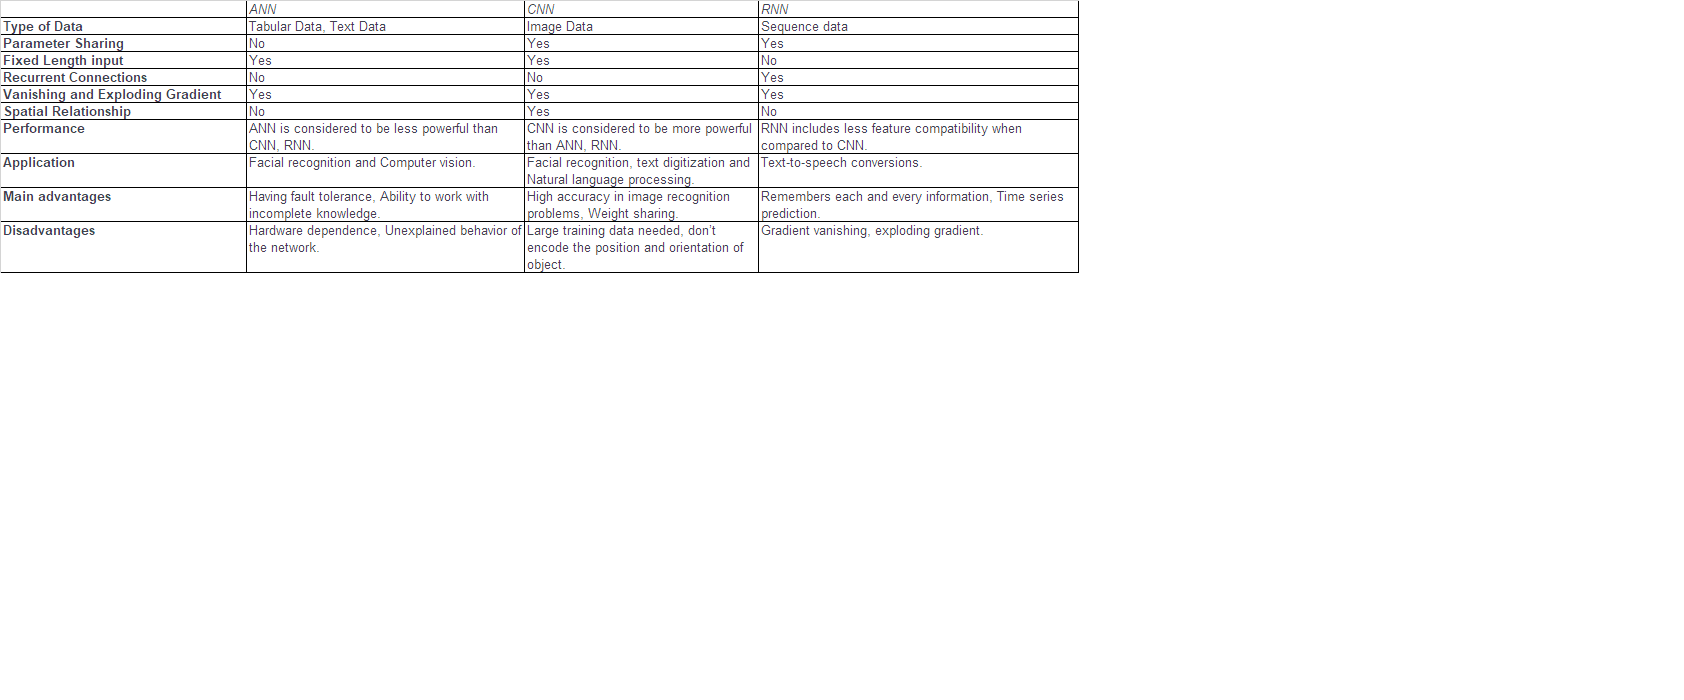

In [6]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson53-comp.png')

CNNs are generally used in computer vision, however they’ve shown promising results when applied to various NLP tasks as well.
An RNN is trained to recognize patterns across time, while a CNN learns to recognize patterns across space.